In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
datafile = "2018ksclean.csv"
df = pd.read_csv(datafile)

df.head()

,Unnamed: 0,ID,name,category,main_category,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,success
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,0
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,0
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,0
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,0
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,0


In [3]:
#creates a table of correlation values

df.corr()
#absolute value determines the strength of the relationship between variables
#i.e.: usd_pledged_real closed related with backers

,Unnamed: 0,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,success
Unnamed: 0,1.000000,-0.364787,0.002662,0.000423,0.000011,0.000557,0.002688,-0.003568
ID,-0.364787,1.000000,0.001735,0.000579,0.000658,0.000092,0.001909,-0.000544
goal,0.002662,0.001735,1.000000,0.007485,0.004149,0.005266,0.939065,-0.024810
pledged,0.000423,0.000579,0.007485,1.000000,0.717808,0.952885,0.005196,0.114239
backers,0.000011,0.000658,0.004149,0.717808,1.000000,0.753316,0.004678,0.131168
usd_pledged_real,0.000557,0.000092,0.005266,0.952885,0.753316,1.000000,0.005785,0.113063
usd_goal_real,0.002688,0.001909,0.939065,0.005196,0.004678,0.005785,1.000000,-0.023561
success,-0.003568,-0.000544,-0.024810,0.114239,0.131168,0.113063,-0.023561,1.000000


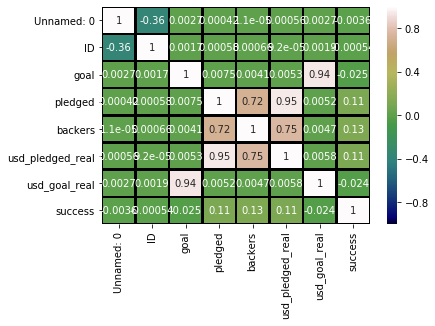

In [4]:
#heatmap to show correlation
corr = df.corr()

sns.heatmap(corr,cmap="gist_earth", vmin=-1, annot=True, linewidths=1.5, linecolor='black')

In [10]:
import statsmodels.formula.api as smf
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line

reg_df=df
result = smf.ols('success ~ pledged + goal + backers', data=reg_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                success   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2328.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:17:26   Log-Likelihood:            -2.4715e+05
No. Observations:              366643   AIC:                         4.943e+05
Df Residuals:                  366639   BIC:                         4.944e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3504      0.001    443.297      0.000       0.349       0.352
pledged     2.064e-07   1.16e-08     17.734      0.000    1.84e-07    2.29e-07
goal        -1.05e-08   6.73e-10    -15.612      0.000   -1.18e-08   -9.18e-09
backers      5.28e-05   1.22e-06     43.137      0.000    5.04e-05    5.52e-05
==============================================================================
Omnibus:                    16634.368   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21676.291
Skew:                           0.466   Prob(JB):                         0.00
Kurtosis:                       3.742   Cond. No.                     1.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R squad needs to be closer to 1 or bigger that .5?